# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Model Evaluation

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)

In [2]:
# load dataset
data = pd.read_csv('student-mat.csv',sep=';')

In [3]:
# rows and columns of the data
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 395
Number of columns: 33


In [4]:
# visualise the dataset
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


The target label, 'G3, has a strong correlation with 'G2' and 'G1'. This is because 'G3' is the final grade while 'G1' and 'G2' correspond to the first and second period grades for the course. It would be more difficult to predict 'G3' without them but the predictions would be more useful.

To this effect, we will drop 'G1' and 'G2' from the dataframe for our analysis.

In [5]:
data = data.drop(['G1','G2'],axis=1)

In [6]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 395
Number of columns: 31


In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10


## Analysis

**We will analyse the following:**

1. The Target Variable

2. Variable Types - Categorical and Numerical

3. Missing Data

4. Numerical Variables - Discrete and Continuous

5. Categorical Variables - Cardinality and Rare Labels

## Target

Let's begin by exploring the target distribution.

<AxesSubplot:xlabel='G3', ylabel='Count'>

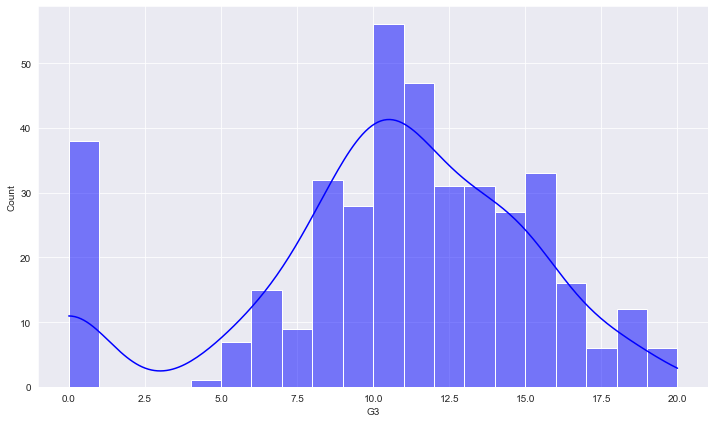

In [8]:
plt.figure(figsize=(12,7))
sns.histplot(x='G3',data=data,kde=True,bins=20,color='blue')

We can see that we have quite a high number of people who scored 0 in the course. It is clear from the plot that these would be students who put absolutely no effort into the course considering the next lowest score after that starts around 5. We could analyse these students in a separate notebook.

We also notice the scores are clustered around 10.0 which could technically be the cut-off mark for a passing grade. We also do not have have high number of exceptional perfomers (>17.5) in the group. 

With the exception zero-score student sample, the distribution looks pretty normal (per the kde plot). To be sure about this assertion, we can run a couple of normality tests. This will determine whether or not we use parametric or non-paramteric methods in deciding the association/relationship with the independent variables in the feature space.

Our normality test will include graphical and statistical methods.

### Quantile-Quantile Plot

In [9]:
from statsmodels.graphics.gofplots import qqplot

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


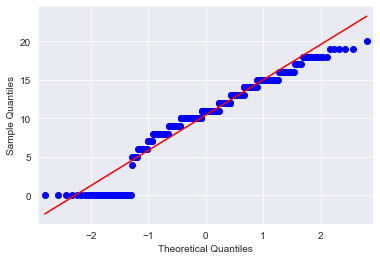

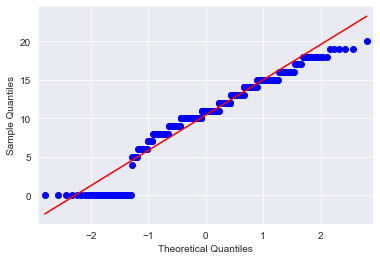

In [10]:
qqplot(data['G3'],line='s')

Notice how we have a large number of points outside the line than we have points actually touching the line.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


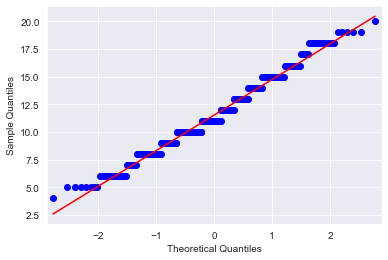

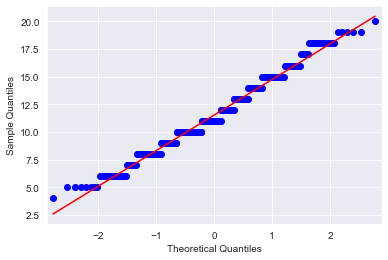

In [11]:
tmp = data.copy()
tmp = tmp[tmp['G3']!=0]['G3']
qqplot(tmp,line='s')

### Shapiro-Wilk Test

In [12]:
from scipy.stats import shapiro

In [13]:
stat, p = shapiro(data['G3'])

In [14]:
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [15]:
stat, p = shapiro(tmp)
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### D'Agostino's Test

In [16]:
from scipy.stats import normaltest

In [17]:
stat, p = normaltest(data['G3'])

In [18]:
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [19]:
stat, p = normaltest(tmp)
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### Anderson-Darling Test

In [20]:
from scipy.stats import anderson

In [21]:
result = anderson(data['G3'])

In [22]:
for i in range(len(result.critical_values)):
    sl,cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'{sl}: {cv}, data looks normal (fail to reject HO)')
    else:
        print(f'{sl}: {cv}, data does not look normal (reject HO)')

15.0: 0.57, data does not look normal (reject HO)
10.0: 0.65, data does not look normal (reject HO)
5.0: 0.779, data does not look normal (reject HO)
2.5: 0.909, data does not look normal (reject HO)
1.0: 1.081, data does not look normal (reject HO)


In [23]:
result = anderson(tmp)

for i in range(len(result.critical_values)):
    sl,cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'{sl}: {cv}, data looks normal (fail to reject HO)')
    else:
        print(f'{sl}: {cv}, data does not look normal (reject HO)')

15.0: 0.57, data does not look normal (reject HO)
10.0: 0.649, data does not look normal (reject HO)
5.0: 0.778, data does not look normal (reject HO)
2.5: 0.908, data does not look normal (reject HO)
1.0: 1.08, data does not look normal (reject HO)


In [24]:
from scipy.stats import boxcox

In [25]:
tmp = data.copy()
tmp = tmp[tmp['G3']!=0]

In [26]:
tmp['G3'] = boxcox(tmp['G3'],0.5)

<AxesSubplot:>

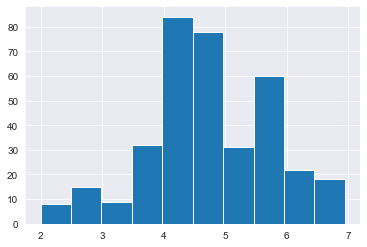

In [27]:
tmp['G3'].hist()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


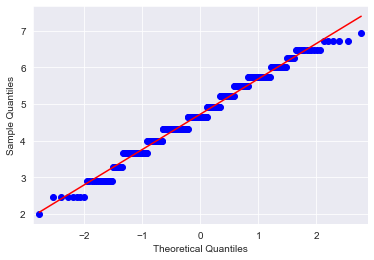

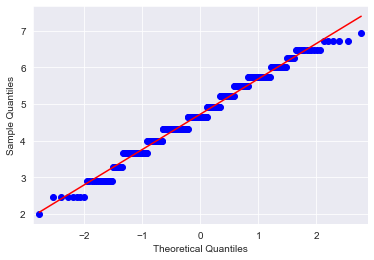

In [28]:
qqplot(tmp['G3'],line='s')

In [29]:
stat, p = shapiro(tmp['G3'])

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


Even after variable transformation and controlling for outliers, none of the tests have indicated that our data is Gaussian-like. This is a string indication that we will need to adopt non-parametric methods for our statistical tests during feature selection.

## Variable Types

Let's identify the categorical and numerical variables.

In [30]:
# to identify categorical variables,
# we will capture those of type *object*
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# print out the categorical variables
cat_vars

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [31]:
# number of categorical variables
len(cat_vars)

17

In [32]:
# identify the numerical variables
num_vars = [var for var in data.columns if var not in cat_vars and var != 'G3']

# print out the numerical variables
num_vars

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [33]:
# number of numerical variables
len(num_vars)

13

# Missing Values

Let's go ahead and find out which variables of the dataset contains missing values.

In [34]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display ordered by % of missing data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

There are no recorded null values in the data. However, null values aren't always the only placeholders for missing values. They could also be represented with different string objects that indicate data is missing, particularly for categorical variables. To find these, we can loop through all the columns, grab the unique values and identify and value suggesting data is missing.

In [35]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


There are no strings or values indicating missing data from our search. We can concude the dataset doesn't have any missing values.

# Numerical Variables

Let's go ahead and find out what numerical variables we have in the dataset.

In [36]:
print(f'Number of numerical variables: {len(num_vars)}')

Number of numerical variables: 13


In [37]:
data[num_vars].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


## Discrete Variables

Let's find the discrete variables in our numerical variables.

In [38]:
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]
print(f'Number of discrete variables: {len(discrete_vars)}')

Number of discrete variables: 12


In [39]:
# visualise the discrete variables
data[discrete_vars].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
0,18,4,4,2,2,0,4,3,4,1,1,3
1,17,1,1,1,2,0,5,3,3,1,1,3
2,15,1,1,1,2,3,4,3,2,2,3,3
3,15,4,2,1,3,0,3,2,2,1,1,5
4,16,3,3,1,2,0,4,3,2,1,2,5


In [40]:
# print out the number of unique values per discrete variables
for var in discrete_vars:
    print(f'{var}: {data[var].nunique()}')

age: 8
Medu: 5
Fedu: 5
traveltime: 4
studytime: 4
failures: 4
famrel: 5
freetime: 5
goout: 5
Dalc: 5
Walc: 5
health: 5


Because we have established our data is non-normal, our analysis will exclude parametric methods and measures of central tendency. Instead, we will adpot nonparametric methods in observing and making inferences from the data. Nonparametric methods require ranking the data before applying them. We will rank our target since that is the variable our model/project will be attempting to explain.

In [41]:
from scipy.stats import rankdata

In [42]:
tmp = data.copy()
tmp = tmp.sort_values(by=['G3'])
ranked = rankdata(tmp['G3'])
tmp['rank'] = ranked  
tmp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,rank
296,GP,F,19,U,GT3,T,4,4,health,other,reputation,other,2,2,0,no,yes,yes,yes,yes,yes,yes,no,2,3,4,2,3,2,0,0,19.5
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,0,19.5
168,GP,F,16,U,GT3,T,2,2,other,other,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5,1,5,1,1,4,0,0,19.5
333,GP,F,18,U,LE3,T,2,2,other,other,home,other,1,2,0,no,no,no,yes,no,yes,yes,yes,4,3,3,1,1,2,0,0,19.5
332,GP,F,18,U,GT3,T,3,3,services,services,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,5,3,4,1,1,4,0,0,19.5


Let's print out the rank sums for the different discrete variables:

In [44]:
for feature in discrete_vars:
    print(f'{feature} rank sums')
    for category in list(tmp[feature].unique()):
        rank_sum = tmp[tmp[feature]==category]['rank'].sum()
        print(f'{category}: {rank_sum}')
    print()

age rank sums
19: 3487.0
17: 18921.5
16: 22237.5
18: 14486.5
15: 18086.0
21: 66.0
22: 86.5
20: 839.0

Medu rank sums
4: 30413.5
2: 18919.5
3: 19076.5
1: 9006.0
0: 794.5

Fedu rank sums
4: 21875.0
1: 13430.5
2: 22643.0
3: 19739.5
0: 522.0

traveltime rank sums
2: 19691.0
1: 53348.0
3: 4003.5
4: 1167.5

studytime rank sums
2: 37368.5
1: 20003.0
3: 14798.0
4: 6040.5

failures rank sums
0: 68187.5
3: 1262.0
1: 7098.5
2: 1662.0

famrel rank sums
2: 3564.5
5: 22312.0
4: 37813.5
3: 12782.5
1: 1737.5

freetime rank sums
3: 28981.0
4: 22514.5
1: 3327.0
2: 14686.0
5: 8701.5

goout rank sums
4: 14926.0
5: 8683.0
3: 27274.5
2: 22846.0
1: 4480.5

Dalc rank sums
2: 12750.0
1: 57306.5
3: 4858.5
5: 1797.0
4: 1498.0

Walc rank sums
3: 15774.5
2: 16944.0
1: 31721.5
5: 5146.0
4: 8624.0

health rank sums
2: 8940.0
5: 28960.5
4: 12512.5
3: 16739.5
1: 11057.5



We will determine the predictive association between these variables and the target in the feature selection notebook.

## Continuous Variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not discrete.

In [45]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars
]

In [46]:
print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 1


In [47]:
# visualise the continuous variables
data[cont_vars].head()

,absences
0,6
1,4
2,10
3,2
4,4


Of all our numerical variables, only 1 happens to be continuous.

<AxesSubplot:xlabel='absences', ylabel='Count'>

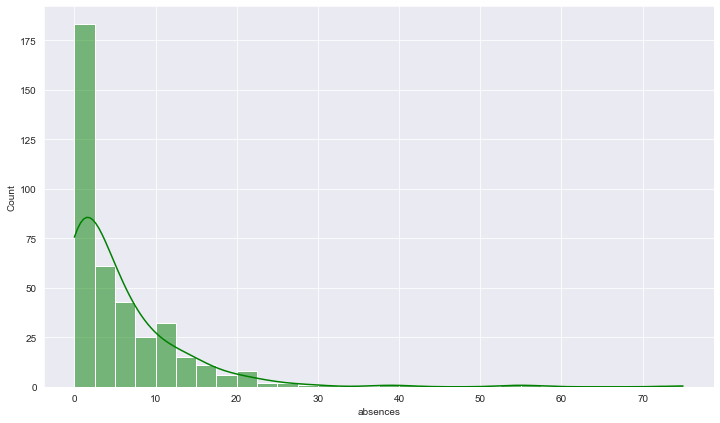

In [48]:
# plot the histogram for the continuous variables
plt.figure(figsize=(12,7))
sns.histplot(x='absences',data=data,bins=30,color='green',kde=True)

Class absences do not follow a normal distribution. It is skewed towards people who are less absent as you move along the axis. The most common absences lie roughly between 0 and 5. Beyond that point, we start to approach outliers. We can say students are frequent for the most part.

Let's see if there is a relationship between absences and grade performance.

Text(0.5, 0, 'absences')

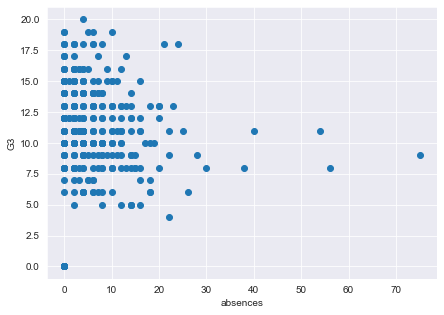

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(x='absences',y='G3',data=data)
plt.ylabel('G3')
plt.xlabel('absences')

There isn't a visible relationship between absences and performance but we notice absences are clustered between 0 and 30. A lot of students performed pretty well given their absences (if we consider 10.0 as a cut off for a passing grade). Their absences might not be extreme but they were considerable. 

There are even students with absences as high as 40 and 50 who still scored a little above the cut-off point. We reckon these students might have been absent for very strong reasons which may not be captured by the feature space. It also bears noting that the scores of the most absent student are clustered around the cut-off point. This could mean their learning was interrupted by external factors and they could have scored much higher if they had been present for much of the course.

On the other hand, there are students with minimal absences (even zero in a few cases) who still failed the course. This trend is understandable considering attendance wouldn't nessecarily guarantee high performance. However, the reasons behind the performance could be cogent and would warrant further investigaton(i.e. learning difficulties, course material, concentration issues, study prioritisation, etc...).

The overall trend is ironic when you consider that the course material is only taught in class in-person. Except the missed classes are supplemented elsewhere, it would take further investigation to understand why certain students with high absences still perform well and students with low absences do not.

# Categorical Variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [50]:
print(f'Number of categorical variables: {len(cat_vars)}')

Number of categorical variables: 17


In [51]:
# visualise the values of the categorical variables
data[cat_vars].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


Let's grab the rank sums of the categorical features.

In [52]:
for feature in cat_vars:
    print(f'{feature} rank sums')
    for category in list(tmp[feature].unique()):
        rank_sum = tmp[tmp[feature]==category]['rank'].sum()
        print(f'{category}: {rank_sum}')
    print()

school rank sums
GP: 70031.0
MS: 8179.0

sex rank sums
F: 38874.0
M: 39336.0

address rank sums
U: 63015.5
R: 15194.5

famsize rank sums
GT3: 54291.0
LE3: 23919.0

Pstatus rank sums
T: 69486.5
A: 8723.5

Mjob rank sums
health: 8394.0
other: 25751.0
services: 22092.5
teacher: 12146.0
at_home: 9826.5

Fjob rank sums
other: 41640.5
services: 21592.5
teacher: 7120.0
at_home: 3958.5
health: 3898.5

reason rank sums
reputation: 22606.5
home: 21189.0
course: 26832.0
other: 7582.5

guardian rank sums
other: 5168.0
mother: 54489.5
father: 18552.5

schoolsup rank sums
no: 70377.0
yes: 7833.0

famsup rank sums
yes: 46813.0
no: 31397.0

paid rank sums
yes: 37199.5
no: 41010.5

activities rank sums
yes: 40383.0
no: 37827.0

nursery rank sums
yes: 62747.0
no: 15463.0

higher rank sums
yes: 75945.5
no: 2264.5

internet rank sums
yes: 66946.0
no: 11264.0

romantic rank sums
no: 54009.0
yes: 24201.0



We will also determine the predictive association between these variables and the target in the feature selection notebook.

## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

<AxesSubplot:>

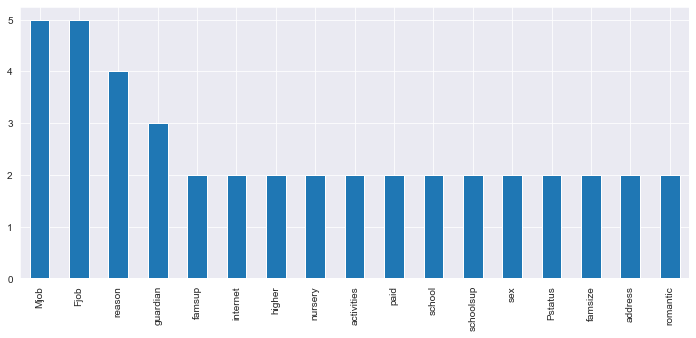

In [53]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [54]:
for var in cat_vars:
    print(f'{var}: {data[var].nunique()}')

school: 2
sex: 2
address: 2
famsize: 2
Pstatus: 2
Mjob: 5
Fjob: 5
reason: 4
guardian: 3
schoolsup: 2
famsup: 2
paid: 2
activities: 2
nursery: 2
higher: 2
internet: 2
romantic: 2


All the categorical variables show low cardinality i.e. only few different labels. This means we won't need to tackle cardinality in our feature engineering notebook.

## Rare Labels

Let's investigate labels present in only a small number of the samples.

In [55]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    # determine the % of observations per category
    tmp = df.groupby(var)['G3'].count() / len(df)
    
    # return categories that are rare
    return tmp[tmp < rare_perc]

In [56]:
# print categories present in less than
# 1% of the observations

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)

Series([], Name: G3, dtype: float64)



All our categorical variables have no rare labels.